<a href="https://colab.research.google.com/github/starscreamwashere/Anubhav30/blob/main/Movie_Rec_System_AnubhavKharkar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
movies_titles=pd.read_csv("/content/movies.csv")
movies_titles

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [ ]:
movies_titles.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings=pd.read_csv("/content/ratings.csv")
ratings


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
movies_titles.shape


(9742, 3)

In [ ]:
ratings.shape


(100836, 4)

In [ ]:
movies_titles.drop(["genres"],inplace=True,axis=1)
movies_titles

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017)
9738,193583,No Game No Life: Zero (2017)
9739,193585,Flint (2017)
9740,193587,Bungo Stray Dogs: Dead Apple (2018)


In [ ]:
ratings.drop(["timestamp"],inplace=True,axis=1)
ratings

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


In [ ]:
movies_titles_ratings=pd.merge(movies_titles,ratings,on="movieId")
movies_titles_ratings.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [ ]:
movies_titles_ratings.groupby("title").describe()

movieId                           \
                                            count      mean  std       min   
title                                                                        
'71 (2014)                                    1.0  117867.0  NaN  117867.0   
'Hellboy': The Seeds of Creation (2004)       1.0   97757.0  NaN   97757.0   
'Round Midnight (1986)                        2.0   26564.0  0.0   26564.0   
'Salem's Lot (2004)                           1.0   27751.0  NaN   27751.0   
'Til There Was You (1997)                     2.0     779.0  0.0     779.0   
...                                           ...       ...  ...       ...   
eXistenZ (1999)                              22.0    2600.0  0.0    2600.0   
xXx (2002)                                   24.0    5507.0  0.0    5507.0   
xXx: State of the Union (2005)                5.0   33158.0  0.0   33158.0   
¡Three Amigos! (1986)                        26.0    2478.0  0.0    2478.0   
À nous la liberté (Freedom for Us) (1931)     1.0    5560.0  NaN    5560.0   

                                                                         \
                                                25%       50%       75%   
title                                                                     
'71 (2014)                                 117867.0  117867.0  117867.0   
'Hellboy': The Seeds of Creation (2004)     97757.0   97757.0   97757.0   
'Round Midnight (1986)                      26564.0   26564.0   26564.0   
'Salem's Lot (2004)                         27751.0   27751.0   27751.0   
'Til There Was You (1997)                     779.0     779.0     779.0   
...                                             ...       ...       ...   
eXistenZ (1999)                              2600.0    2600.0    2600.0   
xXx (2002)                                   5507.0    5507.0    5507.0   
xXx: State of the Union (2005)              33158.0   33158.0   33158.0   
¡Three Amigos! (1986)                        2478.0    2478.0    2478.0   
À nous la liberté (Freedom for Us) (1931)    5560.0    5560.0    5560.0   

                                                    userId              ...  \
                                                max  count        mean  ...   
title                                                                   ...   
'71 (2014)                                 117867.0    1.0  610.000000  ...   
'Hellboy': The Seeds of Creation (2004)     97757.0    1.0  332.000000  ...   
'Round Midnight (1986)                      26564.0    2.0  354.500000  ...   
'Salem's Lot (2004)                         27751.0    1.0  345.000000  ...   
'Til There Was You (1997)                     779.0    2.0  229.000000  ...   
...                                             ...    ...         ...  ...   
eXistenZ (1999)                              2600.0   22.0  389.954545  ...   
xXx (2002)                                   5507.0   24.0  272.916667  ...   
xXx: State of the Union (2005)              33158.0    5.0  386.000000  ...   
¡Three Amigos! (1986)                        2478.0   26.0  279.807692  ...   
À nous la liberté (Freedom for Us) (1931)    5560.0    1.0  527.000000  ...   

                                                         rating            \
                                              75%    max  count      mean   
title                                                                       
'71 (2014)                                 610.00  610.0    1.0  4.000000   
'Hellboy': The Seeds of Creation (2004)    332.00  332.0    1.0  4.000000   
'Round Midnight (1986)                     365.75  377.0    2.0  3.500000   
'Salem's Lot (2004)                        345.00  345.0    1.0  5.000000   
'Til There Was You (1997)                  287.00  345.0    2.0  4.000000   
...                                           ...    ...    ...       ...   
eXistenZ (1999)                            509.25  608.0   22.0  3.863636   
xXx (2002)           

In [ ]:
movies_titles_ratings.groupby("title")["rating"].mean().head()

title
'71 (2014)                                 4.0
'Hellboy': The Seeds of Creation (2004)    4.0
'Round Midnight (1986)                     3.5
'Salem's Lot (2004)                        5.0
'Til There Was You (1997)                  4.0
Name: rating, dtype: float64

In [ ]:
movies_titles_ratings.groupby("title")["rating"].mean().sort_values(ascending=False).head()

title
Gena the Crocodile (1969)              5.0
True Stories (1986)                    5.0
Cosmic Scrat-tastrophe (2015)          5.0
Love and Pigeons (1985)                5.0
Red Sorghum (Hong gao liang) (1987)    5.0
Name: rating, dtype: float64

In [ ]:
movies_titles_ratings.groupby("title")["rating"].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [ ]:
new_frame = pd.DataFrame(columns=['rating_mean','rating_count'])
new_frame['rating_mean']=movies_titles_ratings.groupby("title")["rating"].mean()
new_frame['rating_count']=movies_titles_ratings.groupby('title')['rating'].count()
new_frame.head()


,rating_mean,rating_count
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


<Axes: title={'center': 'Star Rating Distribution'}>

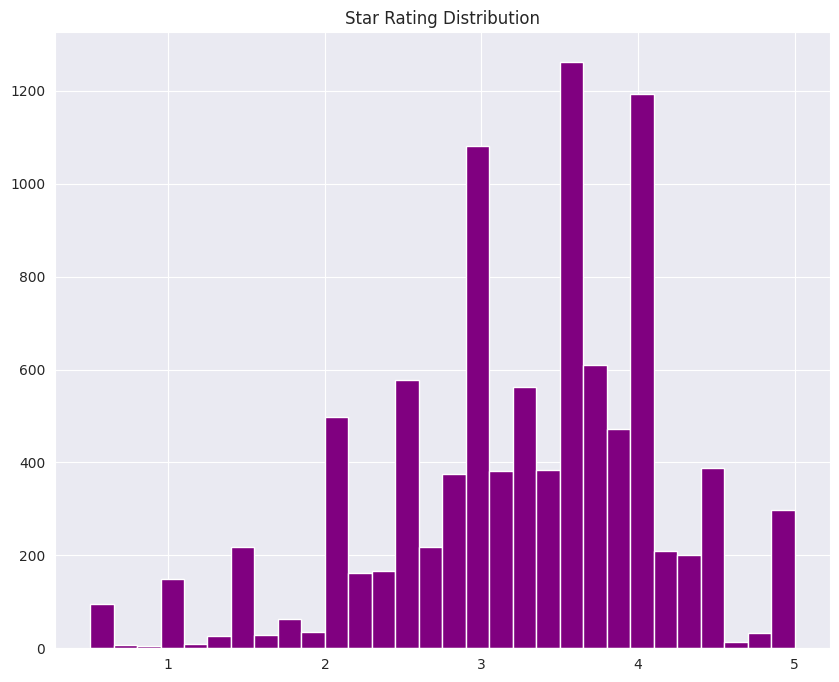

In [ ]:
plt.figure(figsize=(10,8))
plt.xlabel="Star Ratings"
plt.ylabel="Counts"
plt.title("Star Rating Distribution")
sns.set_style("darkgrid")
new_frame['rating_mean'].hist(bins=30, color='purple')

<Axes: title={'center': 'Rating Counts Distribution'}>

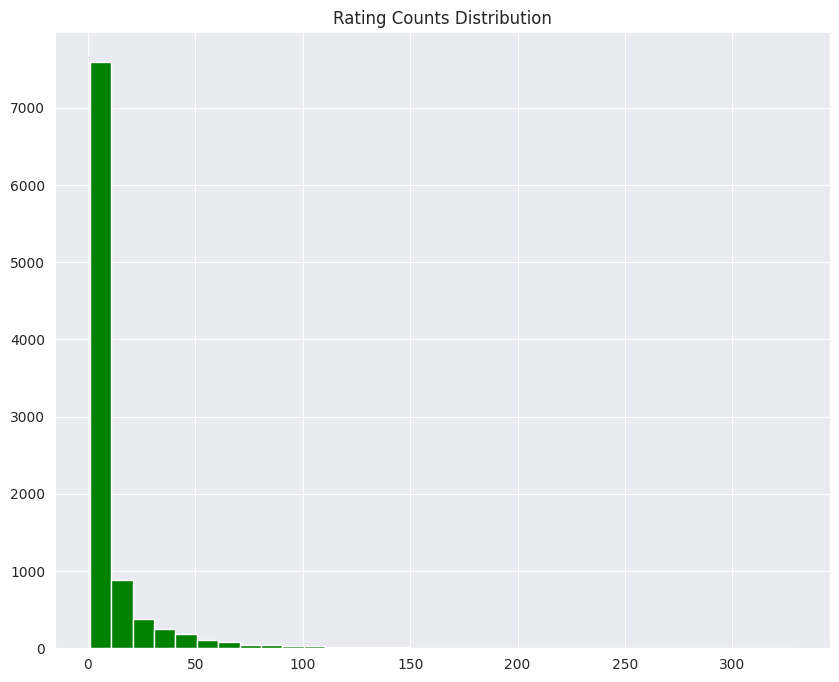

In [ ]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
plt.title("Rating Counts Distribution")
plt.xlabel="Rating Counts"
plt.ylabel="No.of Movies"
new_frame["rating_count"].hist(bins=33, color="green")

<Axes: title={'center': 'Mean Ratings vs Counts'}, xlabel='rating_mean', ylabel='rating_count'>

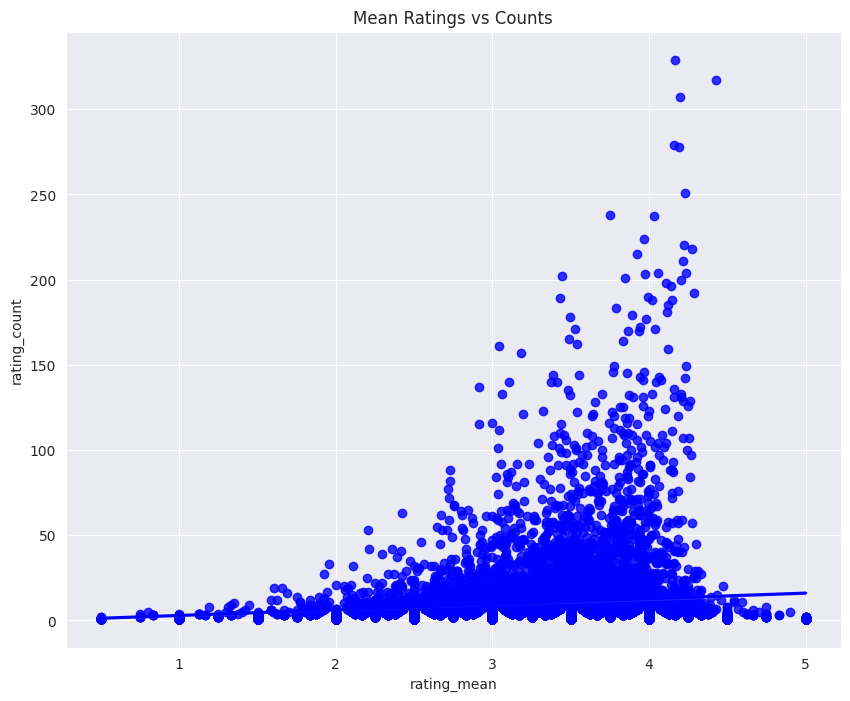

In [ ]:
plt.figure(figsize=(10,8))
plt.title("Mean Ratings vs Counts")
sns.set_style("darkgrid")
sns.regplot(x="rating_mean",y="rating_count",data=new_frame, color="blue")

In [ ]:
new_frame.sort_values("rating_count",ascending=False).head()

,rating_mean,rating_count
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278


In [ ]:
user_movie_rating_matrix= movies_titles_ratings.pivot_table(index="userId",columns="title",values="rating")

user_movie_rating_matrix

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


In [ ]:
user_movie_rating_matrix.shape

(610, 9719)

In [ ]:
pulp_fiction_ratings= user_movie_rating_matrix["Pulp Fiction (1994)"]

In [ ]:
pulp_fiction_correlations=pd.DataFrame(user_movie_rating_matrix.corrwith(pulp_fiction_ratings),columns=["pf_corr"])

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [ ]:
pulp_fiction_correlations.sort_values("pf_corr",ascending=False).head(5)

,pf_corr
title,
Rare Exports: A Christmas Tale (Rare Exports) (2010),1.0
Azumi (2003),1.0
"Maxed Out: Hard Times, Easy Credit and the Era of Predatory Lenders (2006)",1.0
"War Zone, The (1999)",1.0
"Wolfman, The (2010)",1.0


In [ ]:
pulp_fiction_correlations=pulp_fiction_correlations.join(new_frame["rating_count"])

pulp_fiction_correlations.head()

,pf_corr,rating_count
title,,
'71 (2014),NaN,1
'Hellboy': The Seeds of Creation (2004),NaN,1
'Round Midnight (1986),NaN,2
'Salem's Lot (2004),NaN,1
'Til There Was You (1997),NaN,2


In [ ]:
pulp_fiction_correlations.dropna(inplace=True)
pulp_fiction_correlations.sort_values("pf_corr",ascending=False).head()

,pf_corr,rating_count
title,,
Rare Exports: A Christmas Tale (Rare Exports) (2010),1.0,2
Azumi (2003),1.0,2
"Maxed Out: Hard Times, Easy Credit and the Era of Predatory Lenders (2006)",1.0,2
"War Zone, The (1999)",1.0,2
"Wolfman, The (2010)",1.0,2


In [ ]:
pulp_fiction_correlations_50=pulp_fiction_correlations[pulp_fiction_correlations['rating_count']>50]

pulp_fiction_correlations_50.sort_values("pf_corr",ascending=False).head()

,pf_corr,rating_count
title,,
Pulp Fiction (1994),1.000000,307
"Wolf of Wall Street, The (2013)",0.579915,54
Fight Club (1999),0.543465,218
Kill Bill: Vol. 1 (2003),0.504147,131
Interstellar (2014),0.503411,73


In [ ]:
all_movie_correlations=user_movie_rating_matrix.corr(method="pearson",min_periods=50)
all_movie_correlations.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Hellboy': The Seeds of Creation (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Round Midnight (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Salem's Lot (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
watched_data=[['Forrest Gump (1994)',4.0],['Fight Club (1999)',3.5],['Interstellar (2014)',4.0]]

test_movies=pd.DataFrame(watched_data,columns=['Movie_Name','Movie_Rating'])

test_movies.head()

,Movie_Name,Movie_Rating
0,Forrest Gump (1994),4.0
1,Fight Club (1999),3.5
2,Interstellar (2014),4.0


In [ ]:
print(test_movies['Movie_Name'][0])
print(test_movies['Movie_Rating'][0])

Forrest Gump (1994)
4.0


In [ ]:
all_movie_correlations['Forrest Gump (1994)'].dropna()

title
2001: A Space Odyssey (1968)                  0.191558
300 (2007)                                    0.321523
40-Year-Old Virgin, The (2005)                0.156517
Ace Ventura: Pet Detective (1994)             0.137870
Ace Ventura: When Nature Calls (1995)         0.421868
                                                ...   
Willy Wonka & the Chocolate Factory (1971)    0.195081
Wizard of Oz, The (1939)                      0.162368
X-Men (2000)                                  0.200786
X2: X-Men United (2003)                       0.246717
Young Frankenstein (1974)                     0.230049
Name: Forrest Gump (1994), Length: 313, dtype: float64

In [ ]:
recommended_movies=pd.Series()

for i in range(0,2):
    movie=all_movie_correlations[test_movies['Movie_Name'][i]].dropna()
    movie=movie.map(lambda movie_corr: movie_corr*test_movies["Movie_Rating"][i])
    recommended_movies=recommended_movies.append(movie)

In [ ]:
recommended_movies

2001: A Space Odyssey (1968)                  0.766231
300 (2007)                                    1.286094
40-Year-Old Virgin, The (2005)                0.626066
Ace Ventura: Pet Detective (1994)             0.551479
Ace Ventura: When Nature Calls (1995)         1.687472
                                                ...   
Who Framed Roger Rabbit? (1988)               0.874334
Willy Wonka & the Chocolate Factory (1971)    0.663971
Wizard of Oz, The (1939)                     -0.971160
X-Men (2000)                                 -0.063318
X2: X-Men United (2003)                      -0.661265
Length: 529, dtype: float64

In [ ]:
recommended_movies.sort_values(inplace=True, ascending=False)

print(recommended_movies.head(10))

Forrest Gump (1994)                           4.000000
Fight Club (1999)                             3.500000
Mr. Holland's Opus (1995)                     2.608575
Lock, Stock & Two Smoking Barrels (1998)      2.570366
Django Unchained (2012)                       2.225161
Life Is Beautiful (La Vita è bella) (1997)    2.203741
Pocahontas (1995)                             2.200471
Big (1988)                                    1.969404
Good Will Hunting (1997)                      1.936169
Pulp Fiction (1994)                           1.902128
dtype: float64
